In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('book_rating_user.csv')

In [3]:
data.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Country
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,23,usa
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,23,usa


In [4]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Age', 'Country'],
      dtype='object')

In [5]:
# create copy of data
df = data.copy()

In [6]:
data = data[['User-ID','ISBN','Book-Rating','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-M','Image-URL-L']]

In [7]:
data.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Image-URL-L
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...


In [8]:
# Lets remane some wierd columns name
data.rename(columns={
                       'User-ID':'user_id',
                       'ISBN':'isbn',
                       'Book-Rating':'rating',
                       'Book-Title':'title',
                       'Book-Author':'author',
                       'Year-Of-Publication':'year',
                       'Publisher':'publisher',
                       'Image-URL-M':"img_m",
                       'Image-URL-L':"img_l",
                       },inplace=True)

In [9]:
data.head(2)

,user_id,isbn,rating,title,author,year,publisher,img_m,img_l
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...


In [10]:
data.shape

(383841, 9)

In [11]:
# Create a copy of the DataFrame
book_data = data.copy()

## Popularity Based

### Product popularity based recommendation system targeted at new customers
* Popularity based are a great strategy to target the new customers with the most popular products and is very useful to cold start a recommendation engine.

In [12]:
book_data.head(2)

,user_id,isbn,rating,title,author,year,publisher,img_m,img_l
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...


In [13]:
book_data.title.value_counts().reset_index()

,index,title
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
...,...,...
135561,The A-Z of Names in Rock: And the Amazing Stor...,1
135562,Book of Werewolves,1
135563,Gerards Herbal History of Plants,1
135564,White Eagle Medicine Wheel,1


In [14]:
ratings = pd.DataFrame(book_data.groupby('title')['rating'].mean())
ratings.rename({'rating':'avg_ratings'}, axis=1 , inplace =True)
ratings['count_ratings'] = pd.DataFrame(book_data.groupby('title')['rating'].count())
ratings.reset_index(inplace=True)
ratings

,title,avg_ratings,count_ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000,1
2,Dark Justice,10.000000,1
3,Earth Prayers From around the World: 365 Pray...,7.142857,7
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000,2
...,...,...,...
135561,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000,1
135562,Ã?Â?rger mit Produkt X. Roman.,7.000000,3
135563,Ã?Â?sterlich leben.,7.000000,1
135564,Ã?Â?stlich der Berge.,8.000000,1


In [15]:
popular_books = ratings[ratings['count_ratings']>=200].sort_values('avg_ratings', ascending=False).head(50)
popular_books.reset_index(inplace=True, drop=True)
popular_books

,title,avg_ratings,count_ratings
0,Harry Potter and the Goblet of Fire (Book 4),9.125506,247
1,Harry Potter and the Order of the Phoenix (Boo...,9.047393,211
2,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321,277
3,To Kill a Mockingbird,8.977528,267
4,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508,315
5,The Fellowship of the Ring (The Lord of the Ri...,8.882927,205
6,Harry Potter and the Chamber of Secrets (Book 2),8.840491,326
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",8.588000,250
8,Fahrenheit 451,8.549020,204
9,The Secret Life of Bees,8.477833,406


In [16]:
popular_books.sort_values('count_ratings', ascending=False).head(50)

,title,avg_ratings,count_ratings
11,The Lovely Bones: A Novel,8.185290,707
49,Wild Animus,4.390706,581
10,The Da Vinci Code,8.439271,494
9,The Secret Life of Bees,8.477833,406
42,The Nanny Diaries: A Novel,7.437659,393
12,The Red Tent (Bestselling Backlist),8.182768,383
35,Bridget Jones's Diary,7.625995,377
44,A Painted House,7.398907,366
16,Life of Pi,8.080357,336
6,Harry Potter and the Chamber of Secrets (Book 2),8.840491,326


In [17]:
fifty_popular_books = popular_books.merge(book_data, on='title').drop_duplicates('title').reset_index(drop=True)
fifty_popular_books = fifty_popular_books[['title','rating','avg_ratings','count_ratings','author','publisher','img_m','img_l']]
fifty_popular_books

,title,rating,avg_ratings,count_ratings,author,publisher,img_m,img_l
0,Harry Potter and the Goblet of Fire (Book 4),10,9.125506,247,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Order of the Phoenix (Boo...,10,9.047393,211,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),10,9.043321,277,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,To Kill a Mockingbird,9,8.977528,267,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
4,Harry Potter and the Sorcerer's Stone (Harry P...,10,8.936508,315,J. K. Rowling,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
5,The Fellowship of the Ring (The Lord of the Ri...,10,8.882927,205,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
6,Harry Potter and the Chamber of Secrets (Book 2),10,8.840491,326,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",7,8.588000,250,MITCH ALBOM,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...
8,Fahrenheit 451,8,8.549020,204,RAY BRADBURY,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
9,The Secret Life of Bees,9,8.477833,406,Sue Monk Kidd,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...


In [18]:
fifty_popular_books.img_m[30]

'http://images.amazon.com/images/P/0446610038.01.MZZZZZZZ.jpg'

In [19]:
fifty_popular_books.img_m[0][:48]

'http://images.amazon.com/images/P/0439139597.01.'

In [20]:
fifty_popular_books.img_m[0][:48] +'L'+ fifty_popular_books.img_m[0][49:]

'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg'

In [21]:
fifty_popular_books.to_csv('fifty_popular_books.csv', index=False)
pd.read_csv('fifty_popular_books.csv')

,title,rating,avg_ratings,count_ratings,author,publisher,img_m,img_l
0,Harry Potter and the Goblet of Fire (Book 4),10,9.125506,247,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Order of the Phoenix (Boo...,10,9.047393,211,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),10,9.043321,277,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,To Kill a Mockingbird,9,8.977528,267,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
4,Harry Potter and the Sorcerer's Stone (Harry P...,10,8.936508,315,J. K. Rowling,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
5,The Fellowship of the Ring (The Lord of the Ri...,10,8.882927,205,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
6,Harry Potter and the Chamber of Secrets (Book 2),10,8.840491,326,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",7,8.588000,250,MITCH ALBOM,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...
8,Fahrenheit 451,8,8.549020,204,RAY BRADBURY,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
9,The Secret Life of Bees,9,8.477833,406,Sue Monk Kidd,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...


In [22]:
twenty_popular_books = fifty_popular_books.head(20)
twenty_popular_books

,title,rating,avg_ratings,count_ratings,author,publisher,img_m,img_l
0,Harry Potter and the Goblet of Fire (Book 4),10,9.125506,247,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Order of the Phoenix (Boo...,10,9.047393,211,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),10,9.043321,277,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,To Kill a Mockingbird,9,8.977528,267,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
4,Harry Potter and the Sorcerer's Stone (Harry P...,10,8.936508,315,J. K. Rowling,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
5,The Fellowship of the Ring (The Lord of the Ri...,10,8.882927,205,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
6,Harry Potter and the Chamber of Secrets (Book 2),10,8.840491,326,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",7,8.588000,250,MITCH ALBOM,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...
8,Fahrenheit 451,8,8.549020,204,RAY BRADBURY,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
9,The Secret Life of Bees,9,8.477833,406,Sue Monk Kidd,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...


## Collaborative Filtering Based

### Model based Collaborative Filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.It helps in recommending products for a particular user by identifying patterns based on preferences from multiple user’s data.

In [23]:
number_rating = data.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)
number_rating.head(10)

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
5,Flight of Fancy: American Heiresses (Zebra Ba...,1
6,Garfield Bigger and Better (Garfield (Numbere...,1
7,God's Little Promise Book,1
8,Good Wives: Image and Reality in the Lives of...,4
9,Goosebumps Monster Edition 1: Welcome to Dead...,3


In [24]:
data = data.merge(number_rating, on='title')

In [25]:
data.head(2)

,user_id,isbn,rating,title,author,year,publisher,img_m,img_l,num_of_rating
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,28
1,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,28


In [26]:
data.describe()

,user_id,rating,year,num_of_rating
count,383841.000000,383841.000000,383841.000000,383841.000000
mean,136031.222256,7.626702,1965.636678,32.308318
std,80482.268021,1.841341,243.221296,70.442074
min,8.000000,1.000000,0.000000,1.000000
25%,67591.000000,7.000000,1992.000000,2.000000
50%,133788.000000,8.000000,1997.000000,6.000000
75%,206219.000000,9.000000,2001.000000,27.000000
max,278854.000000,10.000000,2050.000000,707.000000


In [27]:
data.shape

(383841, 10)

In [28]:
# Lets take those books which got at least 200 rating of user

final_data = data[data['num_of_rating'] >= 200]

In [29]:
final_data.sample(10)

,user_id,isbn,rating,title,author,year,publisher,img_m,img_l,num_of_rating
57209,105917,0060930535,10,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,218
54899,81848,0385470819,8,A Time to Kill,JOHN GRISHAM,1993,Doubleday,http://images.amazon.com/images/P/0385470819.0...,http://images.amazon.com/images/P/0385470819.0...,214
85641,188263,0385503822,1,The Summons,John Grisham,2002,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,309
63655,159506,0439139600,9,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,247
54152,114146,059035342X,5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,315
14718,172624,0312278586,10,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,393
64509,248477,043935806X,9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,211
46305,215988,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,366
22076,209685,0786868716,6,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,244
10008,54895,0446605239,9,The Notebook,Nicholas Sparks,1998,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,293


In [30]:
final_data.shape

(14197, 10)

In [31]:
# lets drop the duplicates
final_data.drop_duplicates(['user_id','title'],inplace=True)

In [32]:
final_data.shape

(14118, 10)

In [33]:
#final_book_data = final_data.copy()

In [34]:
final_data.head(2)

,user_id,isbn,rating,title,author,year,publisher,img_m,img_l,num_of_rating
955,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,204
956,260897,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,204


In [35]:
final_data.shape

(14118, 10)

#### Utility Matrix based on users rating
**Utility Matrix :** An utility matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [36]:
pivot_tables = final_data.pivot_table(index='title', columns='user_id',values='rating').fillna(0)
pivot_tables

user_id,26,51,91,114,183,242,243,244,254,256,...,278469,278535,278541,278543,278550,278552,278554,278633,278698,278843
title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Time to Kill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angels &amp; Demons,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bridget Jones's Diary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,8.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dreamcatcher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Girl with a Pearl Earring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cosine_similarity(pivot_tables).shape

(50, 50)

In [38]:
similarity = cosine_similarity(pivot_tables)
similarity

array([[1.        , 0.03452379, 0.06206335, ..., 0.03065374, 0.02859525,
        0.00940527],
       [0.03452379, 1.        , 0.06651419, ..., 0.03283807, 0.04591628,
        0.02007064],
       [0.06206335, 0.06651419, 1.        , ..., 0.03546082, 0.03330454,
        0.00717827],
       ...,
       [0.03065374, 0.03283807, 0.03546082, ..., 1.        , 0.02219505,
        0.01032098],
       [0.02859525, 0.04591628, 0.03330454, ..., 0.02219505, 1.        ,
        0.01579381],
       [0.00940527, 0.02007064, 0.00717827, ..., 0.01032098, 0.01579381,
        1.        ]])

In [39]:
# Store the results in a dataframe
user_sim_df = pd.DataFrame(similarity, columns = pivot_tables.index, index = pivot_tables.index)
user_sim_df

title,1st to Die: A Novel,A Painted House,A Time to Kill,Angels &amp; Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Dreamcatcher,Fahrenheit 451,Girl with a Pearl Earring,Good in Bed,...,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Street Lawyer,The Summons,The Testament,Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,1.000000,0.034524,0.062063,0.044885,0.038458,0.034315,0.055782,0.026624,0.010403,0.049280,...,0.028706,0.063618,0.059202,0.081560,0.049300,0.020987,0.039498,0.030654,0.028595,0.009405
A Painted House,0.034524,1.000000,0.066514,0.035778,0.035138,0.049079,0.048174,0.022468,0.030013,0.046416,...,0.041022,0.057238,0.059847,0.077824,0.068170,0.066065,0.028233,0.032838,0.045916,0.020071
A Time to Kill,0.062063,0.066514,1.000000,0.028249,0.042815,0.037888,0.048672,0.021939,0.035482,0.017034,...,0.022260,0.024437,0.112481,0.056582,0.087790,0.021792,0.045693,0.035461,0.033305,0.007178
Angels &amp; Demons,0.044885,0.035778,0.028249,1.000000,0.026801,0.028640,0.033476,0.026597,0.048992,0.042395,...,0.053189,0.041798,0.027742,0.065484,0.038689,0.042450,0.055521,0.034827,0.045755,0.025150
Bridget Jones's Diary,0.038458,0.035138,0.042815,0.026801,1.000000,0.048425,0.021016,0.030116,0.033682,0.070681,...,0.060321,0.062828,0.044029,0.034423,0.031884,0.012244,0.064395,0.047144,0.068373,0.010686
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.034315,0.049079,0.037888,0.028640,0.048425,1.000000,0.039628,0.021623,0.055815,0.059868,...,0.065228,0.054439,0.028143,0.018697,0.012002,0.009172,0.052393,0.038391,0.068083,0.009484
Dreamcatcher,0.055782,0.048174,0.048672,0.033476,0.021016,0.039628,1.000000,0.016289,0.019195,0.012888,...,0.019953,0.019636,0.034101,0.023996,0.064481,0.066140,0.041486,0.019527,0.012856,0.009936
Fahrenheit 451,0.026624,0.022468,0.021939,0.026597,0.030116,0.021623,0.016289,1.000000,0.023357,0.034031,...,0.029861,0.026977,0.011740,0.014366,0.033067,0.044189,0.065380,0.033119,0.019783,0.023954
Girl with a Pearl Earring,0.010403,0.030013,0.035482,0.048992,0.033682,0.055815,0.019195,0.023357,1.000000,0.027902,...,0.083169,0.077474,0.010454,0.018582,0.008773,0.017344,0.032700,0.018910,0.031656,0.008357


In [40]:
book_names = pivot_tables.index
book_names

Index(['1st to Die: A Novel', 'A Painted House', 'A Time to Kill',
       'Angels &amp; Demons', 'Bridget Jones's Diary',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'Dreamcatcher',
       'Fahrenheit 451', 'Girl with a Pearl Earring', 'Good in Bed',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'House of Sand and Fog', 'Interview with the Vampire', 'Jurassic Park',
       'Life of Pi', 'Me Talk Pretty One Day',
       'She's Come Undone (Oprah's Book Club (Paperback))',
       'She's Come Undone (Oprah's Book Club)', 'Snow Falling on Cedars',
       'Summer Sisters', 'Suzanne's Diary for Nicholas', 'The Brethren',
       'The Catcher in the Rye', 'The Chamber', 'The Da Vinci Code',
       'The Fellowship 

In [41]:
np.where(pivot_tables.index=='A Painted House')[0][0]

1

In [42]:
sorted(list(enumerate(similarity[0])),key = lambda x:x[1], reverse=True)[1:16]

[(43, 0.08155969689046857),
 (37, 0.07379218183488806),
 (41, 0.06361793909196488),
 (24, 0.062078593338657805),
 (2, 0.0620633496382577),
 (27, 0.061319386017339605),
 (42, 0.05920216902082639),
 (23, 0.05705368137436405),
 (6, 0.05578156912935236),
 (15, 0.050546373276525884),
 (25, 0.04979328800958852),
 (44, 0.04930019239062531),
 (9, 0.04928007212043532),
 (28, 0.046499563432298316),
 (22, 0.04512605713624132)]

In [43]:
list(enumerate(similarity[0]))[1:16]

[(1, 0.034523791210304154),
 (2, 0.0620633496382577),
 (3, 0.044885052333000074),
 (4, 0.038457935265255885),
 (5, 0.03431511851877035),
 (6, 0.05578156912935236),
 (7, 0.026623675991577316),
 (8, 0.010402903763370743),
 (9, 0.04928007212043532),
 (10, 0.02215798859088079),
 (11, 0.03276962335035734),
 (12, 0.009024886328634185),
 (13, 0.026980963864980084),
 (14, 0.0173075915068285),
 (15, 0.050546373276525884)]

In [44]:
pivot_tables.index[40]

'The Red Tent (Bestselling Backlist)'

In [45]:
def recommend(book_name):
    index = np.where(pivot_tables.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:16]
    
    for i in similar_items:
        print(pivot_tables.index[i[0]])

In [46]:
recommend('A Painted House')

The Brethren
The Firm
The Summons
The Testament
The Lovely Bones: A Novel
The Chamber
A Time to Kill
Timeline
The Partner
The Street Lawyer
The Secret Life of Bees
Summer Sisters
The Pilot's Wife : A Novel
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Dreamcatcher


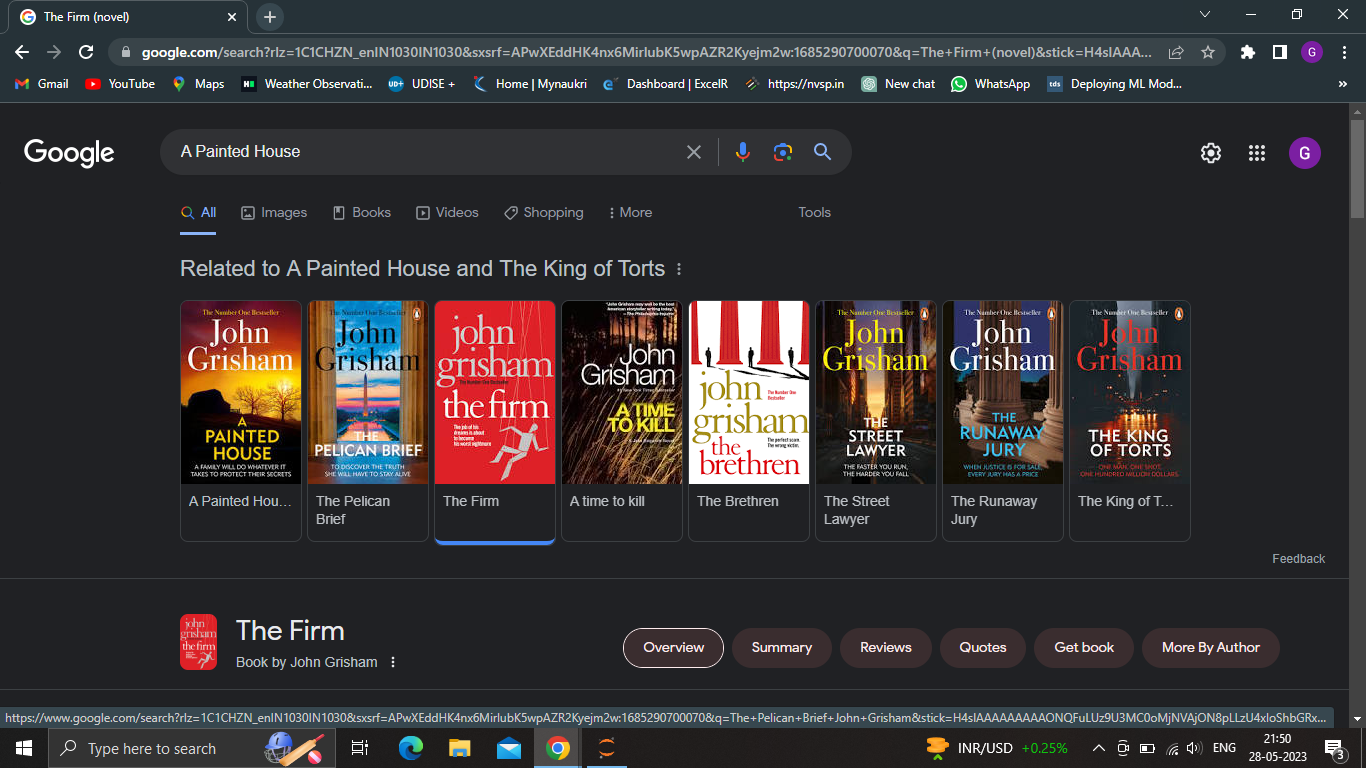

In [47]:
def recommend(book_name):
    pivot_tables = final_data.pivot_table(index='title', columns='user_id',values='rating').fillna(0)
    index = np.where(pivot_tables.index==book_name)[0][0]
    similarity = cosine_similarity(pivot_tables)
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:16]
    
    for i in similar_items:
        print(pivot_tables.index[i[0]])

In [48]:
pivot_tables = final_data.pivot_table(index='title', columns='user_id',values='rating').fillna(0)
index = np.where(pivot_tables.index=='A Painted House')[0][0]
similarity = cosine_similarity(pivot_tables)
similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:16]
    

In [49]:
pivot_tables

user_id,26,51,91,114,183,242,243,244,254,256,...,278469,278535,278541,278543,278550,278552,278554,278633,278698,278843
title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Time to Kill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angels &amp; Demons,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bridget Jones's Diary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,8.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dreamcatcher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Girl with a Pearl Earring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
index

1

In [51]:
similarity

array([[1.        , 0.03452379, 0.06206335, ..., 0.03065374, 0.02859525,
        0.00940527],
       [0.03452379, 1.        , 0.06651419, ..., 0.03283807, 0.04591628,
        0.02007064],
       [0.06206335, 0.06651419, 1.        , ..., 0.03546082, 0.03330454,
        0.00717827],
       ...,
       [0.03065374, 0.03283807, 0.03546082, ..., 1.        , 0.02219505,
        0.01032098],
       [0.02859525, 0.04591628, 0.03330454, ..., 0.02219505, 1.        ,
        0.01579381],
       [0.00940527, 0.02007064, 0.00717827, ..., 0.01032098, 0.01579381,
        1.        ]])

In [52]:
similar_items

[(25, 0.09581985357703057),
 (30, 0.07821609463445364),
 (43, 0.07782388593489933),
 (44, 0.06817023162988509),
 (34, 0.06792465013945834),
 (27, 0.06713736245909649),
 (2, 0.0665141854093343),
 (45, 0.06606497601410234),
 (37, 0.06285075612276346),
 (42, 0.05984676740932916),
 (41, 0.057238315939126774),
 (23, 0.05234791300429005),
 (38, 0.05014673999530915),
 (5, 0.04907871189069056),
 (6, 0.04817350029105221)]

In [53]:
recommend('The Partner')

The Street Lawyer
The Brethren
The Firm
A Time to Kill
The Chamber
The Testament
The Summons
1st to Die: A Novel
Summer Sisters
A Painted House
Interview with the Vampire
House of Sand and Fog
Harry Potter and the Chamber of Secrets (Book 2)
Good in Bed
The Da Vinci Code


In [54]:
def recommend(book_name):
    pivot_tables = final_data.pivot_table(index='title', columns='user_id',values='rating').fillna(0)
    index = np.where(pivot_tables.index==book_name)[0][0]
    similarity = cosine_similarity(pivot_tables)
    similar_items = sorted(list(enumerate(similarity[index])),key = lambda x:x[1], reverse=True)[1:16]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_data[final_data['title'] == pivot_tables.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['img_l'].values))
        
        data.append(item)
    return data

In [55]:
recommend('The Partner')

[['The Street Lawyer',
  'JOHN GRISHAM',
  'http://images.amazon.com/images/P/0440225701.01.LZZZZZZZ.jpg'],
 ['The Brethren',
  'John Grisham',
  'http://images.amazon.com/images/P/0440236673.01.LZZZZZZZ.jpg'],
 ['The Firm',
  'John Grisham',
  'http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg'],
 ['A Time to Kill',
  'JOHN GRISHAM',
  'http://images.amazon.com/images/P/0440211727.01.LZZZZZZZ.jpg'],
 ['The Chamber',
  'John Grisham',
  'http://images.amazon.com/images/P/0385424728.01.LZZZZZZZ.jpg'],
 ['The Testament',
  'John Grisham',
  'http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg'],
 ['The Summons',
  'John Grisham',
  'http://images.amazon.com/images/P/0385503822.01.LZZZZZZZ.jpg'],
 ['1st to Die: A Novel',
  'James Patterson',
  'http://images.amazon.com/images/P/0446610038.01.LZZZZZZZ.jpg'],
 ['Summer Sisters',
  'Judy Blume',
  'http://images.amazon.com/images/P/0440226430.01.LZZZZZZZ.jpg'],
 ['A Painted House',
  'JOHN GRISHAM',
  'http://images.amazo

### Content based Collaborative Filtering system
In this recommender system the content of the book (Title, Author, Publisher) is used to find its similarity with other books. Then the books that are most likely to be similar are recommended.

### Title, Author and Publisher

In [56]:
def content_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in final_data['title'].values:
        rating_counts = pd.DataFrame(final_data['title'].value_counts())
        rare_books = rating_counts[rating_counts['title'] <= 50].index
        common_books = final_data[~final_data['title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            
            common_books = common_books.drop_duplicates(subset=['title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['title','author','publisher']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:11]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['title'].item())
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['author'].item())
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['img_l'].item())


            return books   

In [57]:
content_based_recommender('The Testament')

['The Street Lawyer',
 'JOHN GRISHAM',
 'http://images.amazon.com/images/P/0440225701.01.LZZZZZZZ.jpg',
 'The Firm',
 'John Grisham',
 'http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg',
 'The Brethren',
 'John Grisham',
 'http://images.amazon.com/images/P/0440236673.01.LZZZZZZZ.jpg',
 'The Partner',
 'John Grisham',
 'http://images.amazon.com/images/P/0385472951.01.LZZZZZZZ.jpg',
 'A Time to Kill',
 'JOHN GRISHAM',
 'http://images.amazon.com/images/P/0440211727.01.LZZZZZZZ.jpg',
 'The Chamber',
 'John Grisham',
 'http://images.amazon.com/images/P/0385424728.01.LZZZZZZZ.jpg',
 'The Summons',
 'John Grisham',
 'http://images.amazon.com/images/P/0385503822.01.LZZZZZZZ.jpg',
 'A Painted House',
 'JOHN GRISHAM',
 'http://images.amazon.com/images/P/038550120X.01.LZZZZZZZ.jpg',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'J.R.R. TOLKIEN',
 'http://images.amazon.com/images/P/0345339703.01.LZZZZZZZ.jpg',
 'The Catcher in the Rye',
 'J.D. Salinger',
 'http://imag

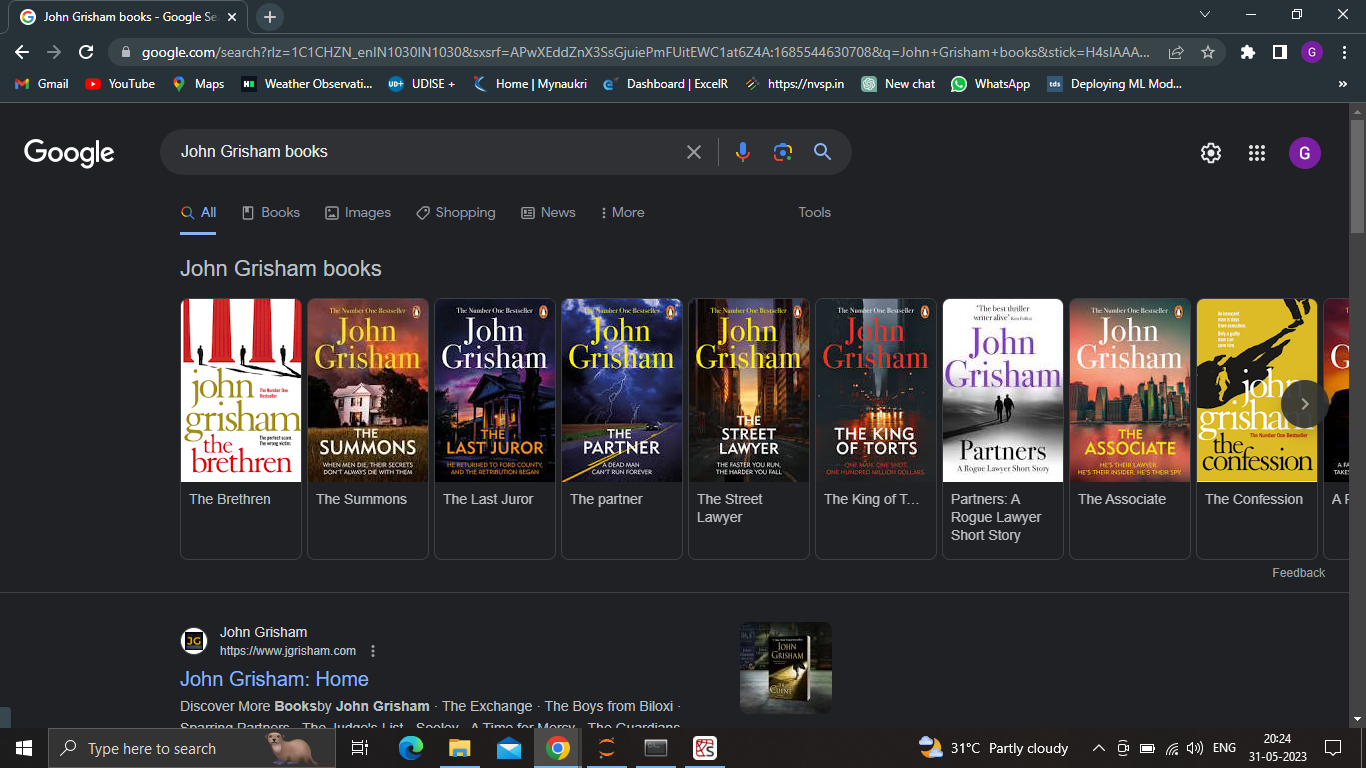

### Deployment

In [58]:
import pickle

# Save final_data as a pickle file
pickle.dump(final_data,open('deployment/final_data.pkl','wb'))

# Save pivot_tables as a pickle file
pickle.dump(pivot_tables,open('deployment/pivot_tables.pkl','wb'))

# Save book_names as a pickle file
pickle.dump(book_names,open('deployment/book_names.pkl','wb'))

